In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 과제 1
ReLu activation function과 derivative function을 구현해보세요
- Hint : np.maximum 함수 사용하면 편리합니다
- 다른 방법 사용하셔도 무방합니다


In [12]:
def relu(x) :
    
    result = np.maximum(0,x)
    
    return result

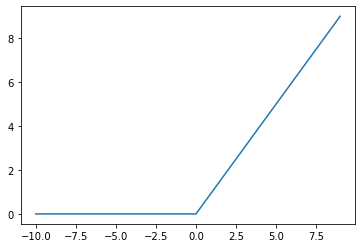

In [13]:
x = np.arange(-10,10)
y = relu(x)

plt.plot(x,y)
plt.show()

In [16]:
def d_relu(x) :
    
    if x >=0 :
        
        result = 1
        
    else :
        
        result = 0
        
    return result

## 과제 2
Deep Learning Basic 코드 파일의 MLP implementation with Numpy library using MNIST dataset 코드 참고해서
Three layer MLP 일 때의 backward_pass 함수를 완성해주세요.   
- Hint : 코드 파일의 예시는 Two layer MLP


In [ ]:
def backward_pass(x, y_true, params) :

    dS3 = params["A3"] - y_true

    grads = {}
    
    grads["dW3"] =  np.dot(dS3, params["A2"].T)/x.shape[1]
    grads["db3"] =  (1/x.shape[1])*np.sum(dS3, axis=1, keepdims=True)/x.shape[1]

    grads["dW2"] =  np.dot(dS2, params["A1"].T)/x.shape[1]
    grads["db2"] =  (1/x.shape[1])*np.sum(dS2, axis=1, keepdims=True)/x.shape[1]

    dA1 = np.dot(params["W2"].T, dS2)
    dS1 = dA1 * d_sigmoid(params["S1"])

    grads["dW1"] = np.dot(dS1, x.T)/x.shape[1]
    grads["db1"] = np.sum(dS1, axis=1, keepdims=True)/x.shape[1]

    return grads

## 과제 3
Deep Learning Basic 코드 파일의 MLP implementation with Pytorch library using MNIST dataset 코드 참고해서
Three layer MLP를 구한후, 학습을 돌려 보세요

hyperparameter는 다음과 같이 설정

- epochs : 100
- hiddensize : 128, 64 (two layer)
- learning_rate : 0.5

In [ ]:
class Net(nn.Module) :
    
    def __init__(self) :
        
        super(Net, self).__init__()
        self.layer1 = nn.Linear(784, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 784)
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.layer3(out)

        return out

In [ ]:
epochs = 100
learning_rate = 0.5

for i in range(epochs) :

    if i == 0 :
        
        params = foward_pass(x_train, params)
    
    grads = backward_pass(x_train, y_train, params)

    params["W1"] -= learning_rate * grads["dW1"]
    params["b1"] -= learning_rate * grads["db1"]
    params["W2"] -= learning_rate * grads["dW2"]
    params["b2"] -= learning_rate * grads["db2"]

    params = foward_pass(x_train, params)
    train_loss = compute_loss(y_train, params["A2"])
    train_acc = compute_accuracy(y_train, params["A2"])

    params_test = foward_pass_test(x_test, params)
    test_loss = compute_loss(y_test, params_test["A2"])
    test_acc = compute_accuracy(y_test, params_test["A2"])

    print("Epoch {}: training loss = {}, training acuracy = {}%, test loss = {}, training acuracy = {}%"
    .format(i + 1, np.round(train_loss, 6), np.round(train_acc, 2), np.round(test_loss, 6), np.round(test_acc, 2)))

## 과제 4
과제 3 부분의 성능을 지금까지 배운 지식을 바탕으로 향상시켜보세요

- Hint : Activation function, hyperparameter setting

In [ ]:
epochs = 100

for learning_rate in np.arange(0,1,0.1) :
    
    for i in range(epochs) :

        if i == 0 :
        
            params = foward_pass(x_train, params)
    
        grads = backward_pass(x_train, y_train, params)

        params["W1"] -= learning_rate * grads["dW1"]
        params["b1"] -= learning_rate * grads["db1"]
        params["W2"] -= learning_rate * grads["dW2"]
        params["b2"] -= learning_rate * grads["db2"]

        params = foward_pass(x_train, params)
        train_loss = compute_loss(y_train, params["A2"])
        train_acc = compute_accuracy(y_train, params["A2"])

        params_test = foward_pass_test(x_test, params)
        test_loss = compute_loss(y_test, params_test["A2"])
        test_acc = compute_accuracy(y_test, params_test["A2"])

        print("Epoch {}:, Learning_rate = {} , training loss = {}, training acuracy = {}%, test loss = {}, training acuracy = {}%"
        .format(i + 1, learning_rate , np.round(train_loss, 6), np.round(train_acc, 2), np.round(test_loss, 6), np.round(test_acc, 2)))

**무엇을 보완하였고, 왜 보완되었는지에 대한 자유 서술 (아래에)**

**A. 학습률을 0.1 ~ 0.9까지 변경해가면서 성능을 확인하고자 하였음**